In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

# Springs5

## Trajectory

In [3]:
test_data = np.load('../data/springs5/valid_position.npy')
test_data.shape

(10000, 49, 2, 5)

### Decoder

In [4]:
prediction = np.load('../logs/springs5/dec/prediction.npy')
prediction.shape

(10, 49, 5, 4)

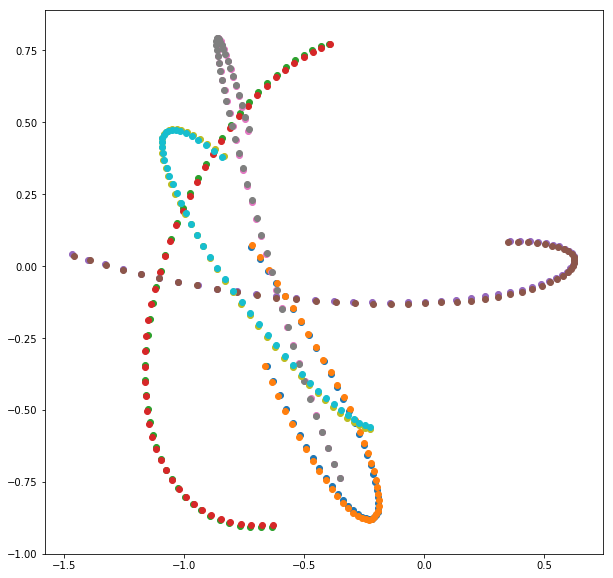

In [5]:
i = 0
for j in range(5):
    plt.scatter(test_data[i, 1:, 0, j], test_data[i, 1:, 1, j])
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1])

### Unsupervised

In [6]:
prediction = np.load('../logs/springs5/full/prediction.npy')
prediction.shape

(10, 49, 5, 4)

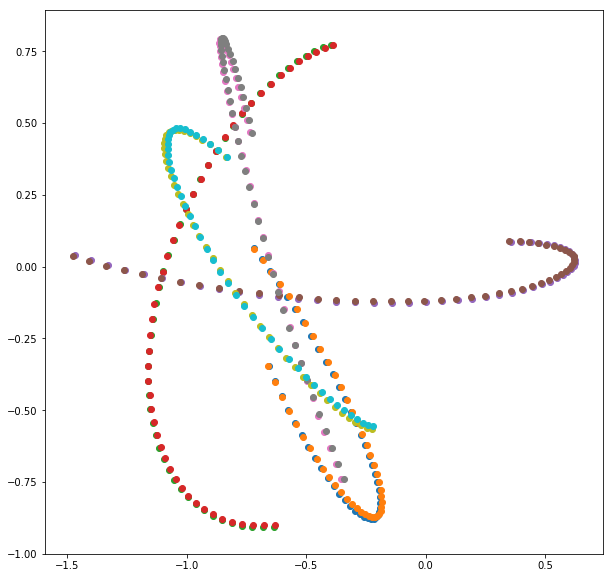

In [7]:
i = 0
for j in range(5):
    plt.scatter(test_data[i, 1:, 0, j], test_data[i, 1:, 1, j])
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1])

## Edges

In [8]:
def edges_to_connection_matrix(edges, n):
    matrix = np.reshape(edges, (n, n-1))
    matrix = [np.insert(matrix[i], i, 0) for i in range(n)]
    return np.asarray(matrix)

In [9]:
test_edge = np.load('../data/springs5/valid_edge.npy').astype(np.int)
n = test_edge.shape[1]

### Encoder

In [10]:
predicted_edge = np.load('../logs/springs5/enc/prediction.npy')
predicted_edge.shape

(10000, 20)

In [11]:
i = 5
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(predicted_edge[i], n))

Ground Truth
[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 0 0 1 0]]

Prediction
[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 0 0 1 0]]


### Unsupervised

In [12]:
infered_edge = np.load('../logs/springs5/full/infered_edge_type.npy')
infered_edge.shape

(10, 20)

In [13]:
i = 4
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(infered_edge[3], n))

Ground Truth
[[0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]]

Prediction
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


# Boids

In [14]:
test_data = np.load('../data/boids/valid_position.npy')
test_data.shape

(1000, 400, 12, 2)

## Trajectory

### Decoder

In [15]:
prediction = np.load('../logs/boids/dec/prediction.npy')
prediction.shape

(10, 400, 12, 4)

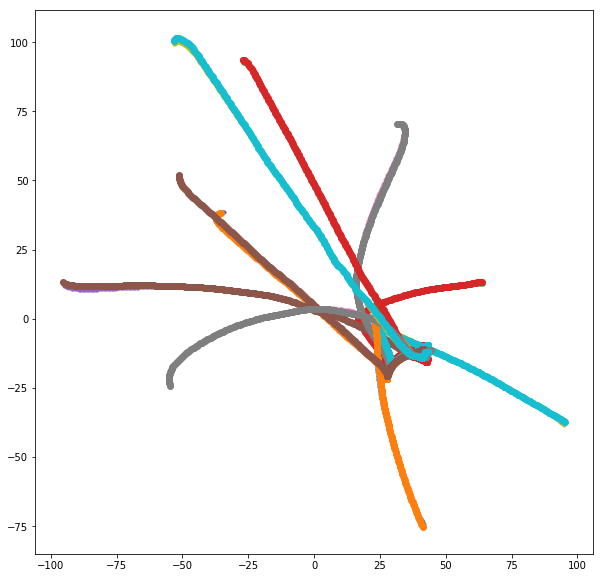

In [16]:
i = 0
for j in range(2, 12):
    plt.scatter(test_data[i, 1:, j, 0], test_data[i, 1:, j, 1], marker='.', linewidth=1)
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1], marker='o', linewidth=1)

### Unsupervised

In [17]:
prediction = np.load('../logs/boids/full/prediction.npy')
prediction.shape

(10, 400, 12, 4)

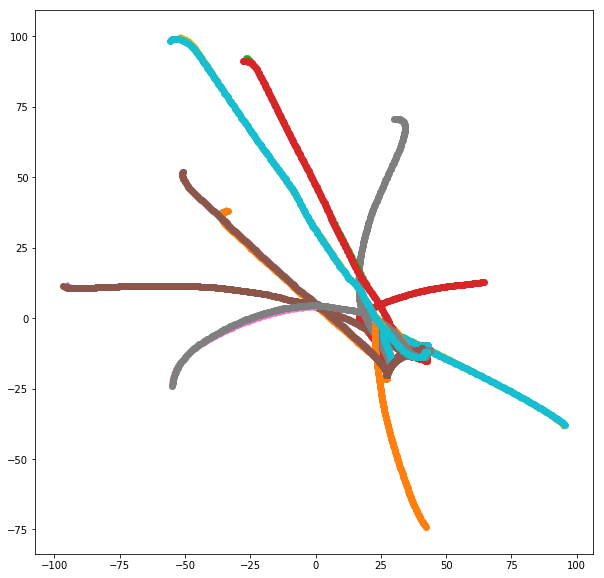

In [18]:
i = 0
for j in range(2, 12):
    plt.scatter(test_data[i, 1:, j, 0], test_data[i, 1:, j, 1], marker='.', linewidth=1)
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1], marker='o', linewidth=1)

## Edge

### Encoder

In [19]:
def edges_to_connection_matrix(edges, n):
    matrix = np.reshape(edges, (n, n-1))
    matrix = [np.insert(matrix[i], i, 0) for i in range(n)]
    return np.asarray(matrix)

In [20]:
test_edge = np.load('../data/boids/valid_edge.npy').astype(np.int)
test_edge.shape

(1000, 12, 12)

In [21]:
predicted_edge = np.load('../logs/boids/enc/prediction.npy')
predicted_edge.shape

(1000, 132)

In [22]:
i = 1
n = 12
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(predicted_edge[i], n))

Ground Truth
[[0 0 2 2 2 2 2 2 2 2 2 2]
 [0 0 3 3 3 3 3 3 3 3 3 3]
 [2 3 0 1 1 1 1 1 1 1 1 1]
 [2 3 1 0 1 1 1 1 1 1 1 1]
 [2 3 1 1 0 1 1 1 1 1 1 1]
 [2 3 1 1 1 0 1 1 1 1 1 1]
 [2 3 1 1 1 1 0 1 1 1 1 1]
 [2 3 1 1 1 1 1 0 1 1 1 1]
 [2 3 1 1 1 1 1 1 0 1 1 1]
 [2 3 1 1 1 1 1 1 1 0 1 1]
 [2 3 1 1 1 1 1 1 1 1 0 1]
 [2 3 1 1 1 1 1 1 1 1 1 0]]

Prediction
[[0 0 2 2 2 2 2 2 2 2 2 2]
 [0 0 2 2 2 2 2 2 3 2 2 2]
 [2 2 0 1 1 1 1 1 1 1 1 1]
 [2 3 1 0 1 1 1 1 1 1 1 1]
 [2 2 1 1 0 1 1 1 1 1 1 1]
 [2 2 1 1 1 0 1 1 1 1 1 1]
 [2 2 1 1 1 1 0 1 1 1 1 1]
 [2 2 1 1 1 1 1 0 1 1 1 1]
 [2 2 1 1 1 1 1 1 0 1 1 1]
 [2 2 1 1 1 1 1 1 1 0 1 1]
 [2 3 1 1 1 1 1 1 1 1 0 1]
 [2 3 1 1 1 1 1 1 1 1 1 0]]


### Unsupervised

In [23]:
infered_edge = np.load('../logs/boids/full/infered_edge_type.npy')
infered_edge.shape

(10, 132)

In [24]:
i = 0
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(infered_edge[3], n))

Ground Truth
[[0 0 2 2 2 2 2 2 2 2 2 2]
 [0 0 3 3 3 3 3 3 3 3 3 3]
 [2 3 0 1 1 1 1 1 1 1 1 1]
 [2 3 1 0 1 1 1 1 1 1 1 1]
 [2 3 1 1 0 1 1 1 1 1 1 1]
 [2 3 1 1 1 0 1 1 1 1 1 1]
 [2 3 1 1 1 1 0 1 1 1 1 1]
 [2 3 1 1 1 1 1 0 1 1 1 1]
 [2 3 1 1 1 1 1 1 0 1 1 1]
 [2 3 1 1 1 1 1 1 1 0 1 1]
 [2 3 1 1 1 1 1 1 1 1 0 1]
 [2 3 1 1 1 1 1 1 1 1 1 0]]

Prediction
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


# Linear_motion7

## Trajectory

In [25]:
test_data = np.load('../data/linear_motion7/valid_position.npy')
test_data.shape

(1000, 50, 7, 2)

### Decoder

In [26]:
prediction = np.load('../logs/linear_motion7/dec/prediction.npy')
prediction.shape

(10, 50, 7, 4)

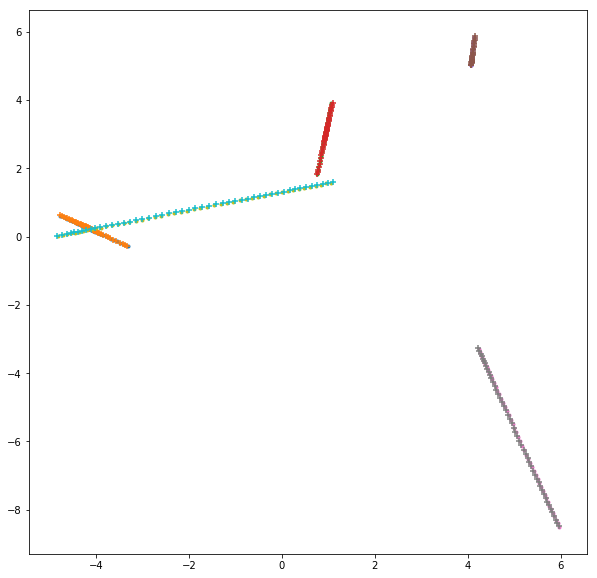

In [27]:
i = 0
for j in range(5):
    plt.scatter(test_data[i, 1:, j, 0], test_data[i, 1:, j, 1], marker='.')
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1], marker='+')

### Unsupervised

In [28]:
prediction = np.load('../logs/linear_motion7/full/prediction.npy')
prediction.shape

(10, 50, 7, 4)

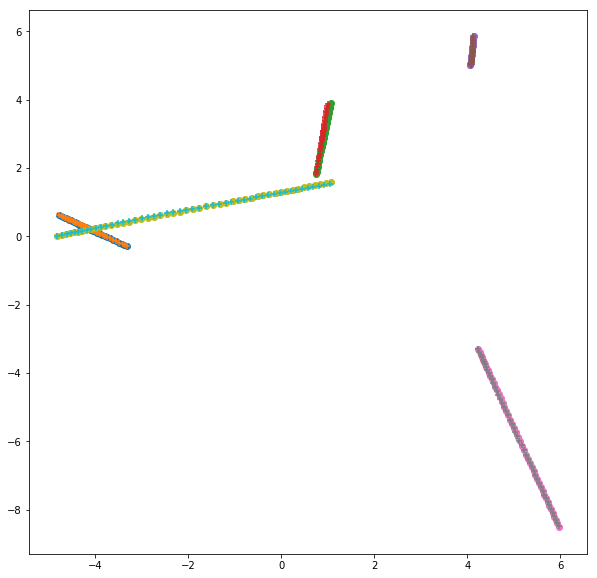

In [29]:
i = 0
for j in range(5):
    plt.scatter(test_data[i, 1:, j, 0], test_data[i, 1:, j, 1], marker='o')
    plt.scatter(prediction[i, :-1, j, 0], prediction[i, :-1, j, 1], marker='+')

## Edges

In [30]:
test_edge = np.load('../data/linear_motion7/valid_edge.npy').astype(np.int)
n = test_edge.shape[1]

### Encoder

In [31]:
predicted_edge = np.load('../logs/linear_motion7/enc/prediction.npy')
predicted_edge.shape

(1000, 42)

In [32]:
i = 1
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(predicted_edge[i], n))

Ground Truth
[[0 1 1 2 2 0 0]
 [1 0 1 2 2 0 0]
 [1 1 0 2 2 0 0]
 [2 2 2 0 1 0 0]
 [2 2 2 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Prediction
[[0 1 1 2 2 0 0]
 [1 0 1 2 2 0 0]
 [1 1 0 2 2 0 0]
 [2 0 2 0 1 0 0]
 [2 2 2 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


### Unsupervised

In [33]:
infered_edge = np.load('../logs/linear_motion7/full/infered_edge_type.npy')
infered_edge.shape

(10, 42)

In [34]:
i = 0
print('Ground Truth')
print(test_edge[i])
print('\nPrediction')
print(edges_to_connection_matrix(infered_edge[3], n))

Ground Truth
[[0 1 1 2 2 0 0]
 [1 0 1 2 2 0 0]
 [1 1 0 2 2 0 0]
 [2 2 2 0 1 0 0]
 [2 2 2 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Prediction
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
